#Importing Libraries

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
df=pd.read_csv("Zomato_data.csv")
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [20]:
#Converting 'rate'
def handleRate(value):
  value = str(value).split('/')
  value = value[0];
  return float(value)

df['rate'] = df['rate'].apply(handleRate)
print(df.head())

                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Question 1 : What type of restaurants do the majority of customers order form ?



Text(0.5, 0, 'type of restaurant')

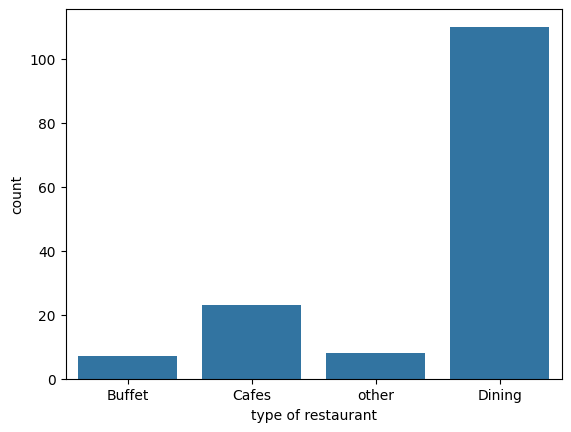

In [22]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel("type of restaurant")

Majority of the restaurant falls in 'Dinning' category.

## Question 2: How many votes has each type of restaurant recieved from customers?

Text(0, 0.5, 'Votes')

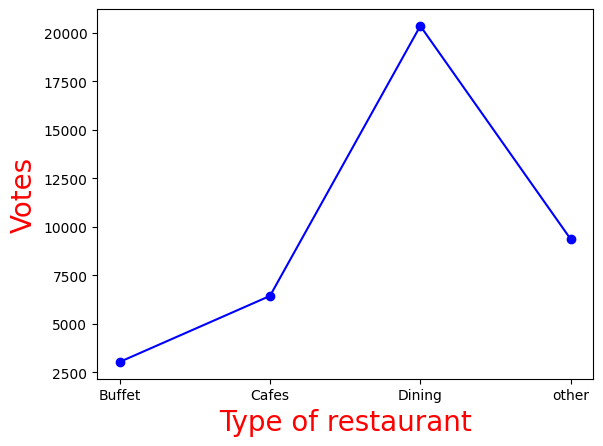

In [23]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result,c="blue",marker="o")
plt.xlabel("Type of restaurant",c="red",size=20)
plt.ylabel("Votes",c="red",size=20)

Dining restaurant has recieved maximum votes

## Question 3: What are the ratings that the majority of restaurants have recieved?

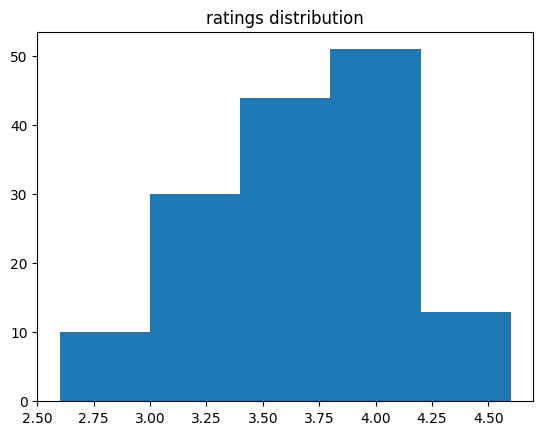

In [24]:
plt.hist(df['rate'],bins=5)
plt.title("ratings distribution")
plt.show()

Majority restaurants recieved ratings from 3.5 to 4

## Question 4: Zomato has observed that most couples order most of their food online. What is their average spending on each other?

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

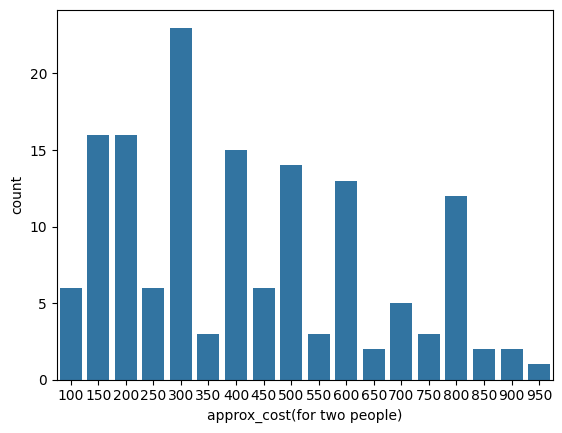

In [25]:
couple_data = df['approx_cost(for two people)']
sns.countplot(x=couple_data)

Majority of couples prefer restaurants with an appropriate cost of 300 rupees.

## Question 5: Which mode(online or offline) has recieved the maximum rating?

<Axes: xlabel='online_order', ylabel='rate'>

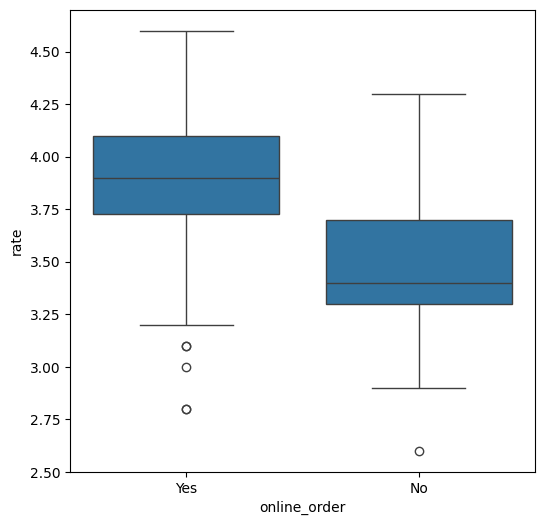

In [26]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order',y= 'rate', data = df)

offline order recieved lower rating in comparison to online order.

## Question 6: Which type of restaurant recieved more offline orders, so that Zomato can provide customers with some good offers?

Text(0.5, 1.0, 'Heatmap')

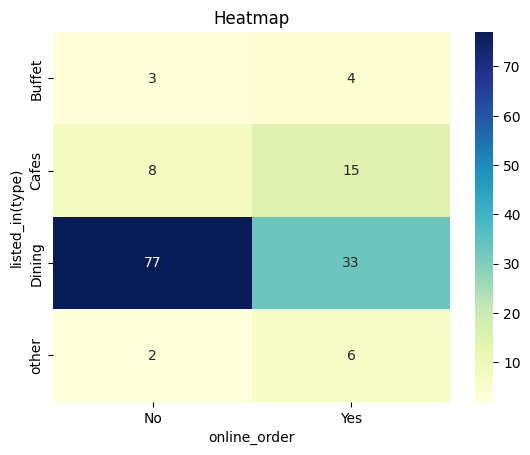

In [27]:
pivot_table = df.pivot_table(index='listed_in(type)',columns='online_order',aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap="YlGnBu", fmt='d')
plt.title("Heatmap")
plt.xlabel("Online Order")
plt.ylabel("Listed In (Type)")
plt.show()

Dining restraurants primarily accept offline orders, whereas Cafes primarily recieve online orders. This suggests that clients prefer orders in person at restaurants, but prefer online ordering at cafes.